# ЛР №5 Проведение исследований с градиентным бустингом
Датасеты: 'Loan new dataset' https://www.kaggle.com/datasets/willianoliveiragibin/financial-risk-v2 \
Задачей было определять, разрешат ли кредит клиенту - столбец LoanApproved (0 - не разрешено, 1 - разрешено) \
'medical_insurance' https://www.kaggle.com/datasets/rahulvyasm/medical-insurance-cost-prediction \
Задачей было предсказывать цену страховки - столбец charges.

# 2. Градиентный бустинг

Загружаем датасет и смотрим его верхние строки

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "loan.csv"
data_class = pd.read_csv(file_path)
data_class.head()



,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.0,7.249.720.460.524.030,11,126928,19.965.200.000.000.000,22.758.963.035.547.000,4.198.059.915.607.370,18.107.719.782.539.400,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,33.090.833.333.333.300,9.351.320.992.549.320,3,43609,207.045,2.010.771.214.969.360,7.940.542.382.198.960,3.898.524.480.253.530,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,33.936.666.666.666.600,8.722.406.105.782.900,6,5205,21.762.700.000.000.000,21.254.800.984.525.700,6.664.066.876.774.690,4.621.569.652.325.320,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.0,8.961.547.069.636.460,5,99452,300.398,3.009.108.491.496.010,10.475.069.802.292.900,3.130.983.116.604.640,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8.605.333.333.333.330,9.413.687.393.229.140,5,227019,197.184,17.599.017.877.532.800,33.017.914.048.482.300,7.020.984.743.780.870,1,36.0


То же самое для датасета медицинской страховки

In [2]:
file_path2 = "medical_insurance.csv"
data_regr = pd.read_csv(file_path2)
data_regr.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Проведем чистку: удалим ненужный столбец ApplicationDate, кодируем категориальные фичи и разделим фичи на целевые и не целевые (как и в предыдущих лабораторных работах)

In [3]:
data_class_cleaned = data_class.drop(columns=['ApplicationDate'])

imputer = SimpleImputer(strategy='mean')
numerical_columns = data_class_cleaned.select_dtypes(include=['int64', 'float64']).columns
data_class_cleaned[numerical_columns] = imputer.fit_transform(data_class_cleaned[numerical_columns])

#кодирование категориальных фич

categorical_columns = data_class_cleaned.select_dtypes(include=['object']).columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data_class_cleaned[column] = le.fit_transform(data_class_cleaned[column].astype(str))
    label_encoders[column] = le

#разделение фич на целевую и не целевую
X = data_class_cleaned.drop(columns=['LoanApproved'])
y = data_class_cleaned['LoanApproved']

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_class = scaler.fit_transform(X_train_class)
X_test_class = scaler.transform(X_test_class)


Кодируем фичи для датасета регрессии

In [4]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
categorical_columns = data_regr.select_dtypes(include=['object']).columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data_regr[column] = le.fit_transform(data_regr[column].astype(str))
    label_encoders[column] = le

from sklearn.model_selection import train_test_split

X = data_regr.drop('charges', axis=1)
y = data_regr['charges']

X_train_regr, X_test_regr, y_train_regr, y_test_regr = train_test_split(X, y, test_size=0.2, random_state=42)

Обучение моделей случайного леса регрессора и классификатора. В качестве метрики качества будем использовать accuracy для классификатора и MSE, R2 для регрессора.

In [5]:
model_gb_class = GradientBoostingClassifier(random_state=42)
model_gb_class.fit(X_train_class, y_train_class)

model_gb_regr = GradientBoostingRegressor(random_state=42)
model_gb_regr.fit(X_train_regr, y_train_regr)

GradientBoostingRegressor(random_state=42)

Посмотрим на результаты обучения:

In [6]:
p_class = model_gb_class.predict(X_test_class)
print("Accuracy: ", metrics.accuracy_score(y_test_class, p_class))

Accuracy:  0.99725


Получаем достаточно высокие значения accuracy - 0.99725.

In [7]:
p_regr = model_gb_regr.predict(X_test_regr)
print("MSE: ", metrics.mean_squared_error(y_test_regr, p_regr))
print("R2: ", metrics.r2_score(y_test_regr, p_regr))

MSE:  18843332.950803585
R2:  0.8772268996916248


Получаем так же хорошие результаты для регрессии - R2=0.877. Построим графики для обоих задач, чтобы визуализировать ошибки

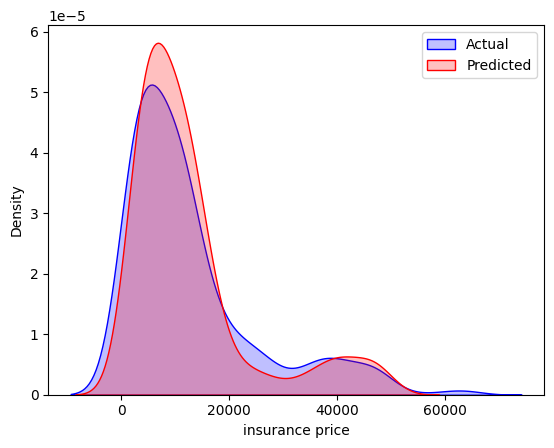

In [8]:
sns.kdeplot(y_test_regr, label='Actual', color='blue', fill=True)
sns.kdeplot(p_regr, label='Predicted', color='red', fill=True)
plt.xlabel('insurance price')
plt.ylabel('Density')
plt.legend()
plt.show()

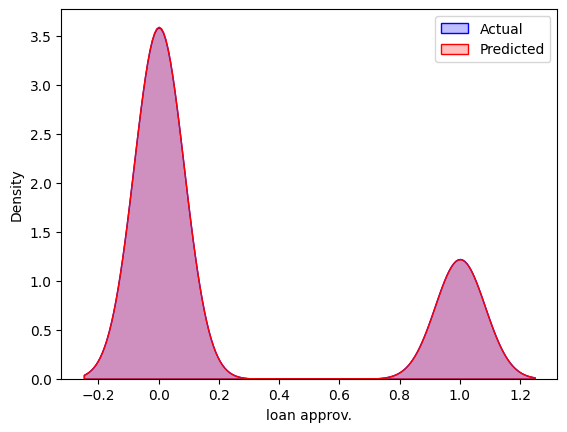

In [9]:
sns.kdeplot(y_test_class, label='Actual', color='blue', fill=True)
sns.kdeplot(p_class, label='Predicted', color='red', fill=True)
plt.xlabel('loan approv.')
plt.ylabel('Density')
plt.legend()
plt.show()

По итогу получаем очень хорошие значения точности для обоих задач.

# Улучшение бейзлайна задачи классификации

Гипотезы для улучшения бейзлайна классификации: \
- Оптимизация гиперпараметров модели, т.е. регулирование глубины деревьев (`max_depth`), скорости обучения (`learning_rate`), количества деревьев (`n_estimators`)
- Попробуем балансировку классов с помощью `smote`
- Расширенная схема кросс валидации `StratifiedKFold`

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold
import numpy as np

data_class_cleaned1 = data_class_cleaned.sample(frac=0.1, random_state=42)

X = data_class_cleaned1.drop(columns=['LoanApproved'])
y = data_class_cleaned1['LoanApproved']

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_class = scaler.fit_transform(X_train_class)
X_test_class = scaler.transform(X_test_class)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_class, y_train_class = sm.fit_resample(X_train_class, y_train_class)

# подбираем параметры
param_grid_class = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [5, 7, None]
}
grid_class = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_class, cv=3, scoring='accuracy')
grid_class.fit(X_train_class, y_train_class)

best_class_m= grid_class.best_estimator_
print("best:", grid_class.best_params_)

p_class_optim = best_class_m.predict(X_test_class)
print("accuracy:", metrics.accuracy_score(y_test_class, p_class_optim))



skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

cv_acc = []
for train_idx, val_idx in skf.split(X_train_class, y_train_class):
    X_tr, X_val = X_train_class[train_idx], X_train_class[val_idx]
    y_tr, y_val = y_train_class[train_idx], y_train_class[val_idx]

    m_cv = GradientBoostingClassifier()
    m_cv.fit(X_tr, y_tr)
    preds_v = m_cv.predict(X_val)
    cv_acc.append(accuracy_score(y_val, preds_v))

print("mean accuracy: ", np.mean(cv_acc))



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


best: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
accuracy: 0.9825
mean accuracy:  0.9868989639694702


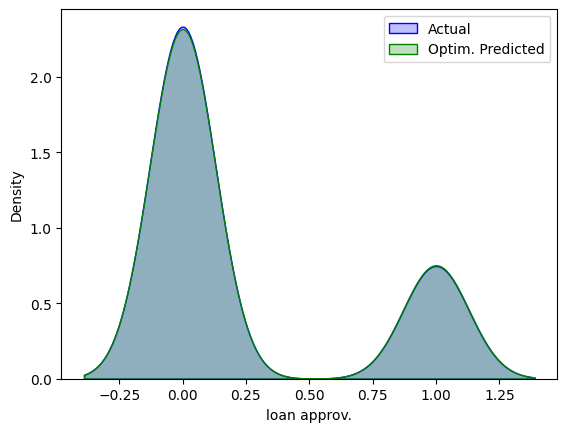

In [13]:
sns.kdeplot(y_test_class, label='Actual', color='blue', fill=True)
sns.kdeplot(p_class_optim, label='Optim. Predicted', color='green', fill=True)
plt.xlabel('loan approv.')
plt.ylabel('Density')
plt.legend()
plt.show()

Гипотезы не улучшили бейзлайн, но уровень accuracy и так достаточно высок.

# Улучшение бейзлайна задачи регрессии
Теперь перейдем к задаче регрессии. Будем предсказывать charges

Гипотезы по улучшению: \
Оптимизация гиперпараметров модели, т.е. регулирование глубины деревьев (`max_depth`), скорости обучения (`learning_rate`), количества деревьев (`n_estimators`)

In [17]:
data_regr2 = data_regr.sample(frac=0.2, random_state=42)
X = data_regr2.drop('charges', axis=1)
y = data_regr2['charges']


X_train_regr, X_test_regr, y_train_regr, y_test_regr = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid_regr = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'loss': ['squared_error', 'huber']
}

grid_regr = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_regr, cv=3, scoring='neg_mean_squared_error')
grid_regr.fit(X_train_regr, y_train_regr)

best_regr_model = grid_regr.best_estimator_
print("best:", grid_regr.best_params_)

p_regr_optimized = best_regr_model.predict(X_test_regr)
print("MSE:", metrics.mean_squared_error(y_test_regr, p_regr_optimized))
print("R2: ", metrics.r2_score(y_test_regr, p_regr_optimized))


best: {'learning_rate': 0.05, 'loss': 'huber', 'max_depth': 3, 'n_estimators': 100}
MSE: 15870233.35508744
R2:  0.8642283947070954


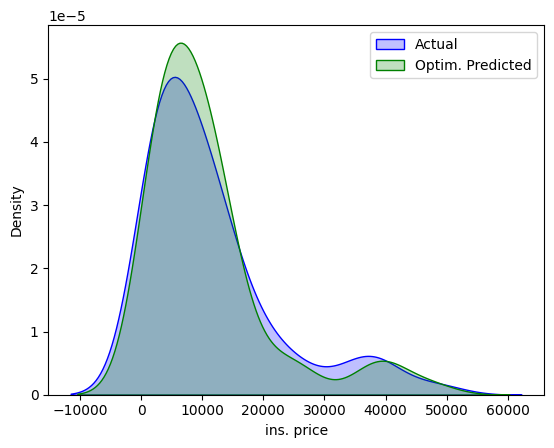

In [18]:
sns.kdeplot(y_test_regr, label='Actual', color='blue', fill=True)
sns.kdeplot(p_regr_optimized, label='Optim. predicted', color='green', fill=True)
plt.xlabel('ins. price')
plt.ylabel('Density')
plt.legend()
plt.show()


Видно, что улучшения бейзлайна не улучшили показатели R2 и MSE, но показатели точности в любом случае остаются крайне высокими.

# Самостоятельная имплементация градиентного бустинга для классификации

Определим класс классификатора со всеми необходимыми функциями:

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

class MyDecisionTreeRegressor:
    def __init__(self, max_depth=3, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.is_leaf = False
        self.split_feature_index = None
        self.split_threshold = None
        self.left_subtree = None
        self.right_subtree = None
        self.value = None

    def fit(self, X, y, depth=0):
        if depth >= self.max_depth or len(y) < self.min_samples_split:
            self.is_leaf = True
            self.value = np.mean(y)
            return

        if np.all(y == y[0]):
            self.is_leaf = True
            self.value = y[0]
            return

        best_feature, best_threshold, min_error = None, None, float('inf')

        for feature_index in range(X.shape[1]):
            X_col = X[:, feature_index]
            thresholds = np.unique(X_col)
            for threshold in thresholds:
                left_mask = X_col <= threshold
                right_mask = X_col > threshold
                y_left, y_right = y[left_mask], y[right_mask]

                if len(y_left) == 0 or len(y_right) == 0:
                    continue

                mean_left, mean_right = np.mean(y_left), np.mean(y_right)

                mse_left = np.mean((y_left - mean_left)**2)
                mse_right = np.mean((y_right - mean_right)**2)
                total_error = mse_left * len(y_left) + mse_right * len(y_right)

                if total_error < min_error:
                    min_error = total_error
                    best_feature = feature_index
                    best_threshold = threshold

        if best_feature is None:
            self.is_leaf = True
            self.value = np.mean(y)
            return

        self.split_feature_index = best_feature
        self.split_threshold = best_threshold

        left_mask = X[:, best_feature] <= best_threshold
        right_mask = X[:, best_feature] > best_threshold

        self.left_subtree = MyDecisionTreeRegressor(
            max_depth=self.max_depth,
            min_samples_split=self.min_samples_split
        )
        self.left_subtree.fit(X[left_mask], y[left_mask], depth=depth+1)

        self.right_subtree = MyDecisionTreeRegressor(
            max_depth=self.max_depth,
            min_samples_split=self.min_samples_split
        )
        self.right_subtree.fit(X[right_mask], y[right_mask], depth=depth+1)

    def predict_row(self, x):
        if self.is_leaf:
            return self.value
        if x[self.split_feature_index] <= self.split_threshold:
            return self.left_subtree.predict_row(x)
        else:
            return self.right_subtree.predict_row(x)

    def predict(self, X):
        return np.array([self.predict_row(x) for x in X])

class MyGradientBoostingClassifier:
    def __init__(self,
                 n_estimators=10,
                 learning_rate=0.1,
                 max_depth=3,
                 min_samples_split=2,
                 random_state=42):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.random_state = random_state

        self.trees = []
        self.init_value = 0.0

    def _sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))

    def fit(self, X, y):
        np.random.seed(self.random_state)

        y = np.array(y)

        F = np.full(shape=len(X), fill_value=self.init_value, dtype=np.float64)

        self.trees = []
        for _ in range(self.n_estimators):
            p = self._sigmoid(F)

            residuals = y - p
            tree = MyDecisionTreeRegressor(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split
            )
            tree.fit(X, residuals)
            self.trees.append(tree)

            F += self.learning_rate * tree.predict(X)

    def predict_proba(self, X):
        F = np.zeros(X.shape[0])
        for tree in self.trees:
            F += self.learning_rate * tree.predict(X)
        p = self._sigmoid(F)
        return np.vstack([1 - p, p]).T

    def predict(self, X): ####
        proba = self.predict_proba(X)
        return (proba[:, 1] >= 0.5).astype(int)


Проведем все те же действия - обучим бейзлайн

accuracy:   0.975


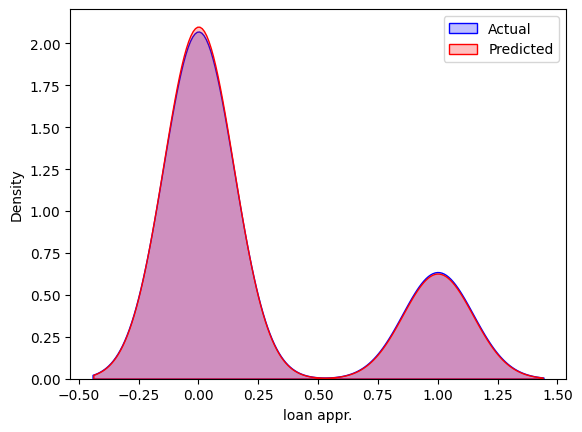

In [20]:
file_path = "loan.csv"
data_class = pd.read_csv(file_path)

data_class_cleaned = data_class.drop(columns=['ApplicationDate'])

imputer = SimpleImputer(strategy='mean')
numerical_columns = data_class_cleaned.select_dtypes(include=['int64', 'float64']).columns
data_class_cleaned[numerical_columns] = imputer.fit_transform(data_class_cleaned[numerical_columns])

categorical_columns = data_class_cleaned.select_dtypes(include=['object']).columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data_class_cleaned[column] = le.fit_transform(data_class_cleaned[column].astype(str))
    label_encoders[column] = le

data_class_cleaned2 = data_class_cleaned.sample(frac=0.05, random_state=42)

X = data_class_cleaned2.drop(columns=['LoanApproved'])
y = data_class_cleaned2['LoanApproved']

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_class = scaler.fit_transform(X_train_class)
X_test_class = scaler.transform(X_test_class)

my_gb_clf = MyGradientBoostingClassifier(
    n_estimators=10,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
my_gb_clf.fit(X_train_class, y_train_class)

p_class = my_gb_clf.predict(X_test_class)

print("accuracy:  ", metrics.accuracy_score(y_test_class, p_class))

sns.kdeplot(y_test_class, label='Actual', color='blue', fill=True)
sns.kdeplot(p_class, label='Predicted', color='red', fill=True)
plt.xlabel('loan appr.')
plt.ylabel('Density')
plt.legend()
plt.show()


Видно, что собственная реализация модели имеет не такой высокий уровень accuracy, как модель из sklearn - 0.975, но он все равно очень высок.

Применим оптимальные параметры, найденные ранее, в качестве гипотезы оптимизации.

accuracy:  0.9916666666666667


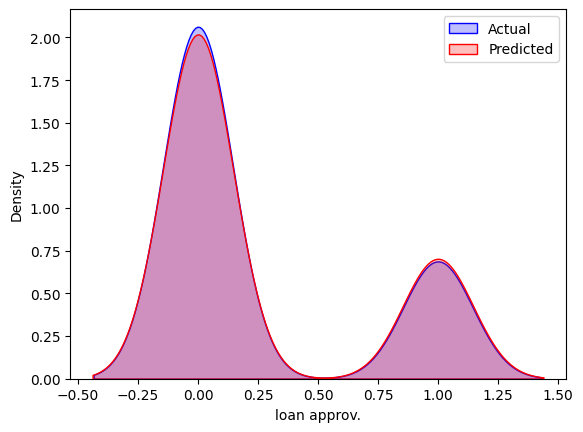

In [21]:
data_class_cleaned3 = data_class_cleaned.sample(frac=0.06, random_state=42)

X = data_class_cleaned3.drop(columns=['LoanApproved'])
y = data_class_cleaned3['LoanApproved']

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_class = scaler.fit_transform(X_train_class)
X_test_class = scaler.transform(X_test_class)

grid_class = MyGradientBoostingClassifier(
    n_estimators=20,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
grid_class.fit(X_train_class, y_train_class)


p_class_1 = best_class_model.predict(X_test_class)
print("accuracy: ", metrics.accuracy_score(y_test_class, p_class_1))

sns.kdeplot(y_test_class, label='Actual', color='blue', fill=True)
sns.kdeplot(p_class_1, label='Predicted', color='red', fill=True)
plt.xlabel('loan approv.')
plt.ylabel('Density')
plt.legend()
plt.show()


Видим, что собственная реализация (после применения гипотез) все же не проявляет ту же точность, что и модель sklearn, хотя гипотезы улучшили accuracy на 0.0166

# Самостоятельная имплементация решающего дерева для регрессии:

Перейдем к самостоятельной имплементации регрессии. Опишем класс, повторим действия по обучению

In [22]:
import numpy as np

class MyDecisionTreeRegressor:
    def __init__(self, max_depth=3, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split

        self.split_feature_index = None
        self.split_threshold = None

        self.left_subtree = None
        self.right_subtree = None

        self.value = None
        self.is_leaf = False

    def fit(self, X, y, depth=0):
        if (depth >= self.max_depth) or (len(y) < self.min_samples_split):
            self.is_leaf = True
            self.value = np.mean(y)
            return

        if np.all(y == y[0]):
            self.is_leaf = True
            self.value = y[0]
            return
        best_feature, best_threshold = None, None
        min_error = float('inf')

        n_samples, n_features = X.shape

        for feature_index in range(n_features):
            X_col = X[:, feature_index]
            thresholds = np.unique(X_col)
            for threshold in thresholds:
                left_mask = (X_col <= threshold)
                right_mask = (X_col > threshold)

                y_left, y_right = y[left_mask], y[right_mask]

                if len(y_left) == 0 or len(y_right) == 0:
                    continue

                mean_left, mean_right = np.mean(y_left), np.mean(y_right)
                mse_left = np.mean((y_left - mean_left)**2)
                mse_right = np.mean((y_right - mean_right)**2)
                total_error = mse_left * len(y_left) + mse_right * len(y_right)

                if total_error < min_error:
                    min_error = total_error
                    best_feature = feature_index
                    best_threshold = threshold

        if best_feature is None:
            self.is_leaf = True
            self.value = np.mean(y)
            return

        self.split_feature_index = best_feature
        self.split_threshold = best_threshold

        left_mask = X[:, best_feature] <= best_threshold
        right_mask = X[:, best_feature] > best_threshold

        self.left_subtree = MyDecisionTreeRegressor(
            max_depth=self.max_depth,
            min_samples_split=self.min_samples_split
        )
        self.left_subtree.fit(X[left_mask], y[left_mask], depth + 1)

        self.right_subtree = MyDecisionTreeRegressor(
            max_depth=self.max_depth,
            min_samples_split=self.min_samples_split
        )
        self.right_subtree.fit(X[right_mask], y[right_mask], depth + 1)

    def predict_row(self, x):
        if self.is_leaf:
            return self.value
        if x[self.split_feature_index] <= self.split_threshold:
            return self.left_subtree.predict_row(x)
        else:
            return self.right_subtree.predict_row(x)

    def predict(self, X):
        return np.array([self.predict_row(row) for row in X])

class MyGradientBoostingRegressor:
    def __init__(self,
                 n_estimators=10,
                 learning_rate=0.1,
                 max_depth=3,
                 min_samples_split=2,
                 random_state=42):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.random_state = random_state

        self.trees = []
        self.init_value = 0.0

    def fit(self, X, y):
        np.random.seed(self.random_state)
        X = np.array(X)
        y = np.array(y)

        self.init_value = np.mean(y)
        F_current = np.full(len(X), self.init_value)

        self.trees = []
        for i in range(self.n_estimators):
            residuals = y - F_current

            tree = MyDecisionTreeRegressor(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split
            )
            tree.fit(X, residuals)
            self.trees.append(tree)

            F_current += self.learning_rate * tree.predict(X)

    def predict(self, X):
        X = np.array(X)
        y_pred = np.full(X.shape[0], self.init_value, dtype=float)
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return y_pred


Обучим бейзлайн модель на собственной реализации случайного леса регрессора:

MSE:  40832389.06545996
R2: 0.7339579462055552


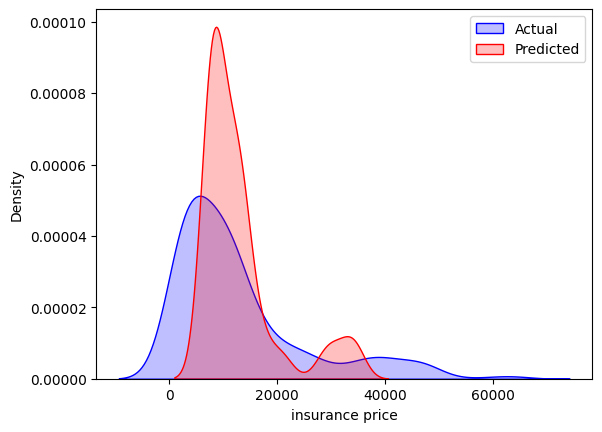

In [23]:
categorical_columns = data_regr.select_dtypes(include=['object']).columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data_regr[column] = le.fit_transform(data_regr[column].astype(str))
    label_encoders[column] = le

X = data_regr.drop('charges', axis=1)
y = data_regr['charges']

X_train_regr, X_test_regr, y_train_regr, y_test_regr = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_regr = scaler.fit_transform(X_train_regr)
X_test_regr = scaler.transform(X_test_regr)

my_gb_regr_base = MyGradientBoostingRegressor(n_estimators=10, random_state=42)
my_gb_regr_base.fit(X_train_regr, y_train_regr)
p_regr_base = my_gb_regr_base.predict(X_test_regr)

print("MSE: ", metrics.mean_squared_error(y_test_regr, p_regr_base))
print("R2:", metrics.r2_score(y_test_regr, p_regr_base))

sns.kdeplot(y_test_regr, label='Actual', color='blue', fill=True)
sns.kdeplot(p_regr_base, label='Predicted', color='red', fill=True)
plt.xlabel('insurance price')
plt.ylabel('Density')
plt.legend()
plt.show()


Получаем R2 0.733, что меньше, чем у бейзлайн модели из sklearn. Теперь применим гпиотезы по улучшению

MSE: 15870233.35508744
R2: 0.8642283947070954


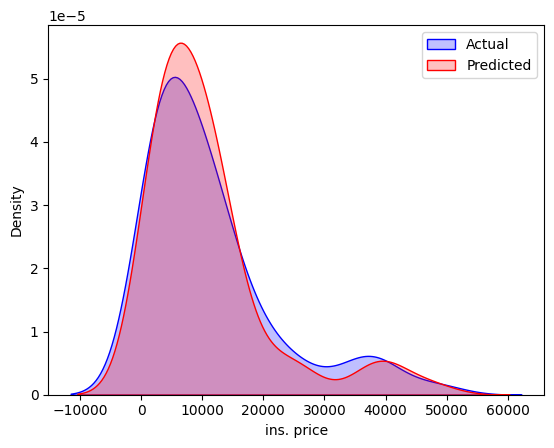

In [24]:
data_regr2 = data_regr.sample(frac=0.2, random_state=42)
X = data_regr2.drop('charges', axis=1)
y = data_regr2['charges']

X_train_regr, X_test_regr, y_train_regr, y_test_regr = train_test_split(X, y, test_size=0.2, random_state=42)


grid_regr = MyGradientBoostingRegressor(n_estimators=100,
                 learning_rate=0.05,
                 max_depth=3)
grid_regr.fit(X_train_regr, y_train_regr)


p_regr_optim = best_regr_model.predict(X_test_regr)
print("MSE:", metrics.mean_squared_error(y_test_regr, p_regr_optim))
print("R2:", metrics.r2_score(y_test_regr, p_regr_optim))

sns.kdeplot(y_test_regr, label='Actual', color='blue', fill=True)
sns.kdeplot(p_regr_optim, label='Predicted', color='red', fill=True)
plt.xlabel('ins. price')
plt.ylabel('Density')
plt.legend()
plt.show()

Видим, что улучшения привели к улучшению результата - точность стала 0.864 R2. Это близко к библиотечной реализации, но, видимо, библиотечная реализация из sklearn имеет более сложную структуру, которая позволяет ей вырваться вперед по метрикам качества.